# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | ovalle
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | revda
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | newman
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | dondo
Processing Record 11 of Set 1 | macas
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | kuanda
Processing Record 16 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | bomdila
Processing Record 20 of Set 1 | alausi
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | papatowai
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,298.14,73,75,6.69,CC,1689869089
1,ilulissat,69.2167,-51.1000,283.16,87,75,3.09,GL,1689869132
2,ovalle,-30.5983,-71.2003,294.69,33,100,0.78,CL,1689869020
3,gadzhiyevo,69.2551,33.3362,283.35,88,100,9.33,RU,1689868907
4,revda,56.8010,59.9303,289.18,82,37,3.45,RU,1689869175


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,298.14,73,75,6.69,CC,1689869089
1,ilulissat,69.2167,-51.1000,283.16,87,75,3.09,GL,1689869132
2,ovalle,-30.5983,-71.2003,294.69,33,100,0.78,CL,1689869020
3,gadzhiyevo,69.2551,33.3362,283.35,88,100,9.33,RU,1689868907
4,revda,56.8010,59.9303,289.18,82,37,3.45,RU,1689869175


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Text(0.5, 1.0, 'City Max Latitude vs. Temperature 7-20-2023')

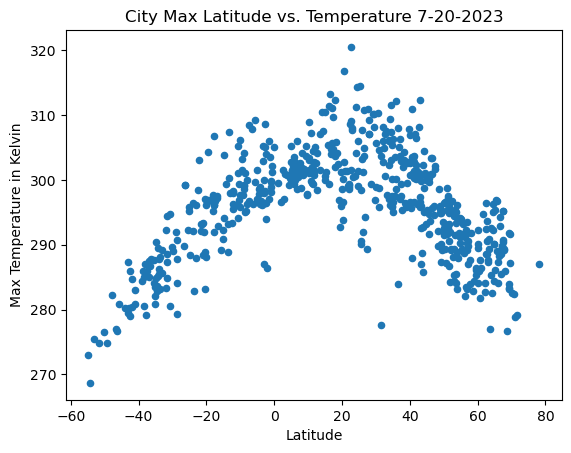

In [14]:
city_data_df.plot.scatter("Lat", "Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Kelvin")
plt.title("City Max Latitude vs. Temperature 7-20-2023")

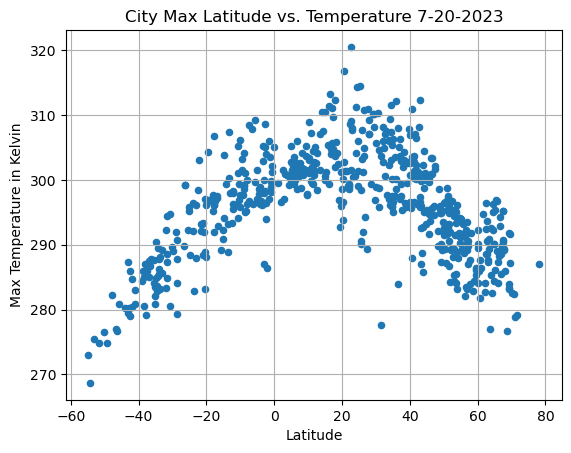

In [15]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Kelvin")
plt.title("City Max Latitude vs. Temperature 7-20-2023")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

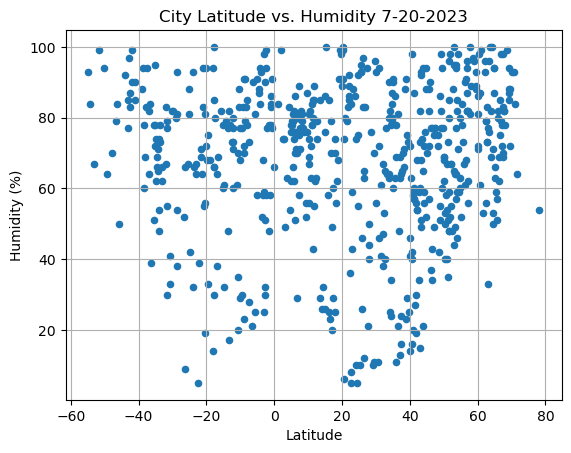

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity 7-20-2023")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

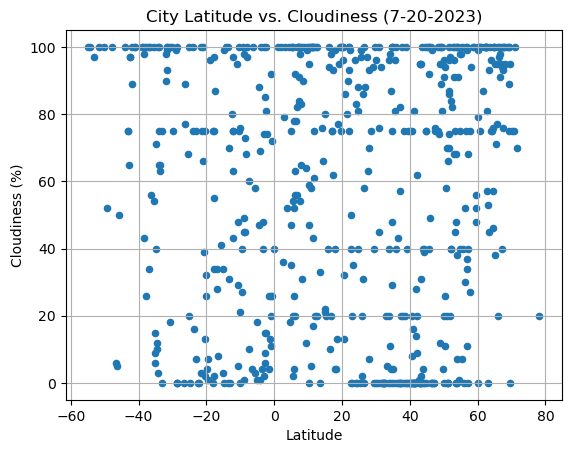

In [17]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (7-20-2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

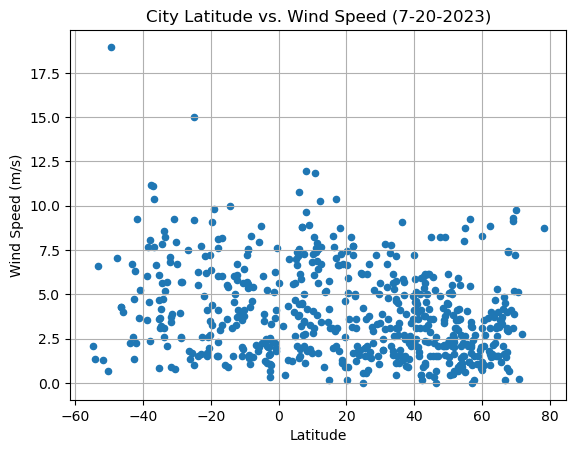

In [18]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (7-20-2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def lin_reg(df, x_values, y_values):
    """Creates a linear regression plot for a given Dataframe, x-axis, and y-axis.

    Args:
        df (Dataframe): Dataframe used to create plot.
        x_values (String): Column values in df for x-axis.
        y_values (String): Column values in df for y-axis.
    """
    # Get parameters for linear regression equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_values], df[y_values])

    # Create string for regression equation.
    reg_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot.
    df.plot.scatter(x_values, y_values)

    # Plot line of best fit.
    (x_min, x_max) = plt.xlim()
    (y_min,y_max) = plt.ylim()
    plt.axline((0,intercept), slope=slope, color="red")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.annotate(reg_eq, (0.2,0.2),xycoords='figure fraction', fontsize=10,color="red")

    # Print r-value.
    print(f"The r-value is: {rvalue}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,298.14,73,75,6.69,CC,1689869089
2,ovalle,-30.5983,-71.2003,294.69,33,100,0.78,CL,1689869020
6,port elizabeth,-33.9180,25.5701,286.31,54,75,3.09,ZA,1689868868
8,lebu,-37.6167,-73.6500,285.97,94,100,11.16,CL,1689869176
9,dondo,-19.6094,34.7431,296.88,75,7,3.25,MZ,1689869176


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.675729177079106


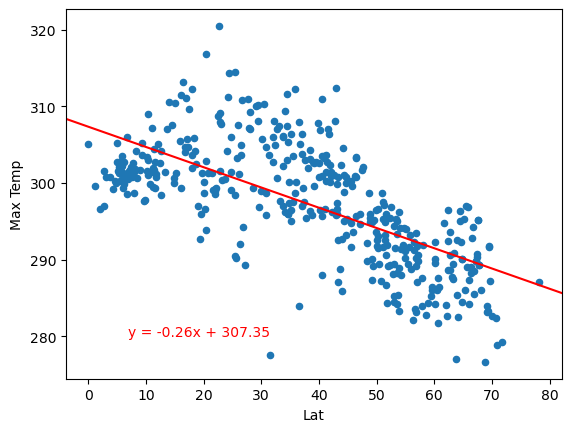

In [39]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.8404252113152879


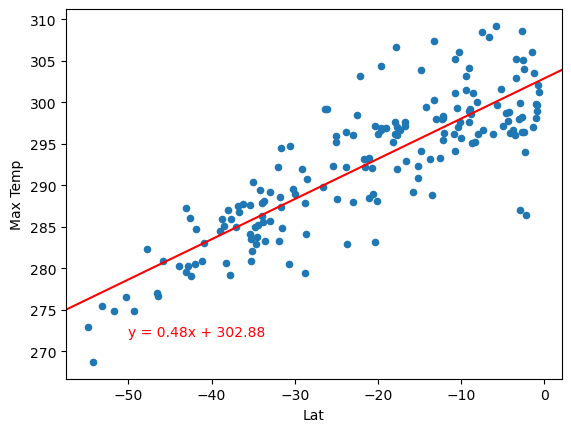

In [40]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** With r-values close of -0.67 and 0.84, we can see that city latitude and temperature show moderately strong correlation, indicating that the further one moves from the equator (Latitude = 0), the lower the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11440060265929532


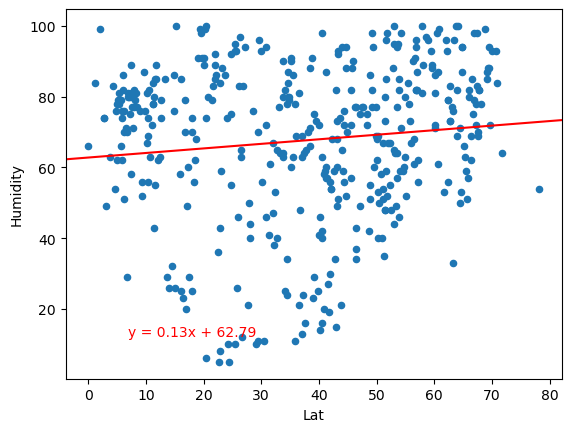

In [41]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Humidity")

The r-value is: -0.1434386119922095


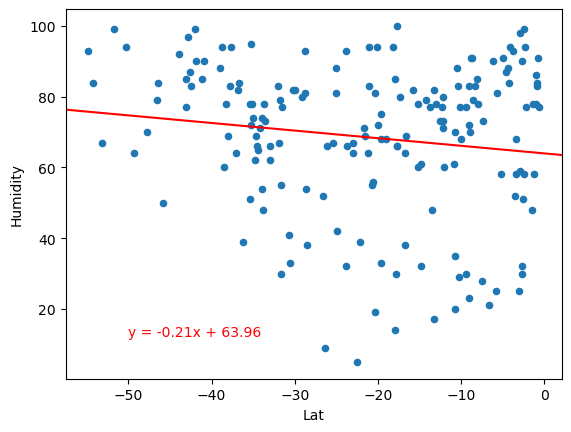

In [42]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** The r-values for the above plots are 0.11 and -0.14, which indicates that little to no correlation exists between distance from the equator and humidity for the date the data was collected.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04995769166374901


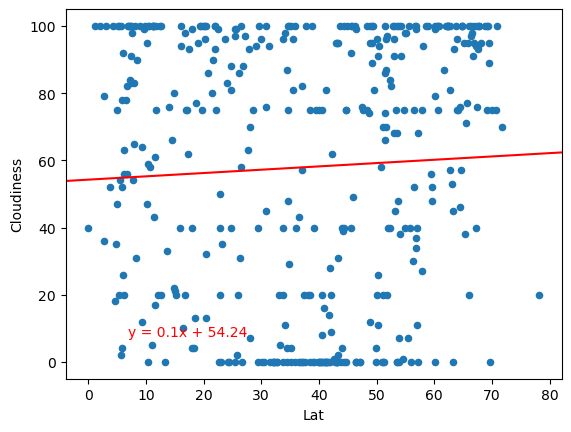

In [43]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: -0.27354718261963745


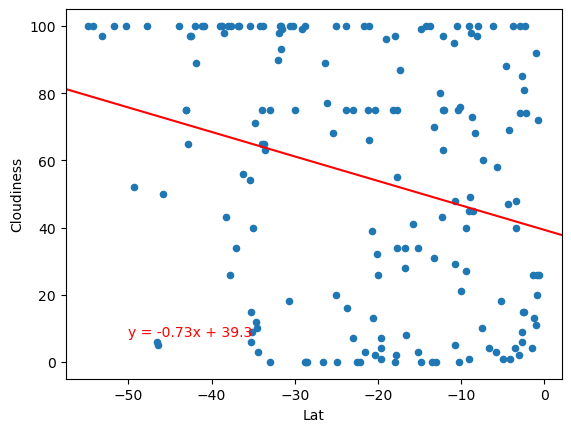

In [44]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** Again, our low r-values (0.05 and -0.27) indicate that little to no correlation exists between distance from the equator and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.2561853177279577


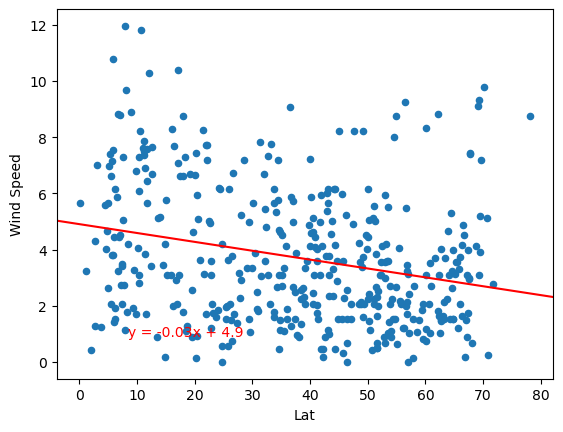

In [45]:
# Northern Hemisphere
lin_reg(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.21267260658210882


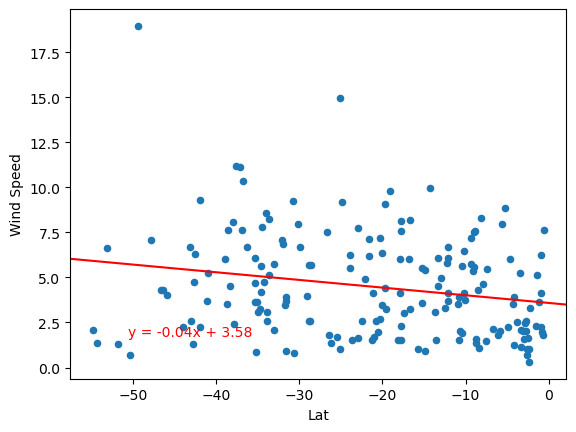

In [46]:
# Southern Hemisphere
lin_reg(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** Both r-values (-0.26 and -0.21) have low absolute value, indicating that little to no correlation exists between latitude and wind speed on the day the data was collected.